In [ ]:
#!python -m pip install -U scikit-image
#conda install -c conda-forge ipympl

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
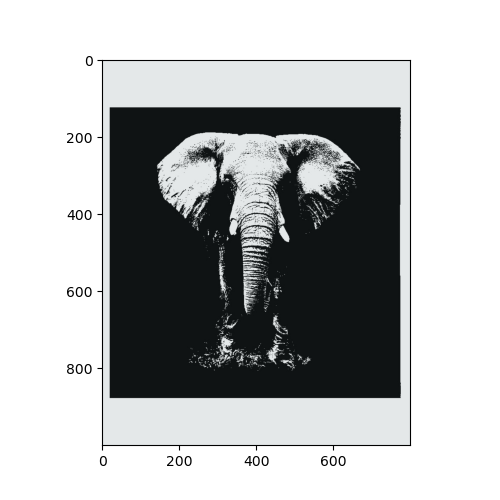

In [5]:
%matplotlib widget
import skimage.io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage
from scipy.cluster.vq import kmeans, vq
import seaborn as sns

image = cv2.imread('eleph.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('eleph2.jpg', quant)
image0 = cv2.imread('eleph2.jpg')

plt.figure(num = 1, figsize = (5,5))
plt.imshow(image0)

cv2.imread('eleph.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
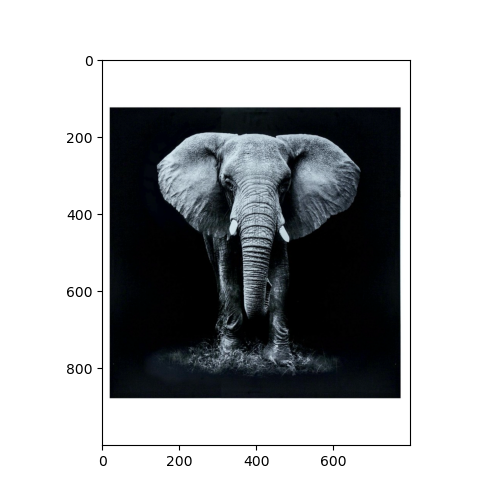

In [6]:
plt.figure(num = 2, figsize = (5,5))
plt.imshow(image)

In [ ]:
#!pip install opencv-python

In [ ]:
# Dont run it !

'''
import skimage.io
import matplotlib.pyplot as plt
img_path="eleph.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
#plt.show()

'''

# 1 - Noise And Filtring

In [ ]:
# Dont run it

'''
img_path="image.jpg"
img = skimage.io.imread(img_path)/255.0

@interact(mode=widgets.Dropdown(options={"Gaussian": "gaussian",
                                  "Localvar": "localvar",
                                  "Poisson": "poisson",
                                   "Salt": "salt",
                                   "Pepper": "pepper",
                                   "s&p": "s&p",
                                   "Speckle": "speckle"
                                  },
                          description='Choisir votre noise',
    value='gaussian',
    disabled=False))

def plotnoise(mode):
    plt.clf()
    
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        if mode=='gaussian':
            flt='gaussian'
            img_modified = scipy.ndimage.filters.gaussian_filter(gimg, sigma=1.0)
     
        if mode in ['s&p','salt','pepper','localvar']:

            img_modified = cv2.normalize(gimg, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
            
            img_modified = cv2.medianBlur(img_modified,3)
            flt='median'
        if mode=='poisson':
            img_modified = new_image = cv2.blur(gimg,(9,9))
            flt='mean'
        
        plt.figure(num = 3, figsize = (5,5))
        
        plt.subplot(131)
        plt.imshow(img)
        plt.title('Orginal')
        plt.axis("off")
        
        plt.subplot(132)
        plt.imshow(img_modified)
        plt.title('mean')
        plt.axis("off")
        
        plt.subplot(133)
        plt.imshow(gimg)
        plt.title(mode)
        plt.axis("off")
       
        
    else:
        plt.imshow(img)
    
    #plt.show()
    
'''

In [7]:
img_path="image.jpg"
img = skimage.io.imread(img_path)/255.0

@interact(mode=widgets.Dropdown(options={"Gaussian": "gaussian",
                                  "Localvar": "localvar",
                                  "Poisson": "poisson",
                                   "Salt": "salt",
                                   "Pepper": "pepper",
                                   "s&p": "s&p",
                                   "Speckle": "speckle"
                                  },
                          description='Choisir votre noise',
    value='gaussian',
    disabled=False))

def plotnoise(mode='gaussian'):
    #plt.subplot(r,c,i)
    plt.clf()
    if mode is not None:
        
        gimg = skimage.util.random_noise(img, mode=mode)
        

        normal = cv2.normalize(gimg, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        filtred = cv2.medianBlur(normal, 3)
        
        plt.figure(num = 3)
        
        plt.subplot(221)
        plt.imshow(img)
        plt.title('Orginal')
        plt.axis("off")
        
        plt.subplot(223)
        plt.imshow(gimg)
        plt.title(mode)
        plt.axis("off")
        
        plt.subplot(224)
        plt.imshow(filtred)
        plt.title("filtrted")
        plt.axis("off")
    else:
        plt.figure(num = 3, figsize = (5,5))
        plt.imshow(img)
    
    plt.show()

interactive(children=(Dropdown(description='Choisir votre noise', options={'Gaussian': 'gaussian', 'Localvar':…

## 2 - Using K-means for segmenting an Image

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
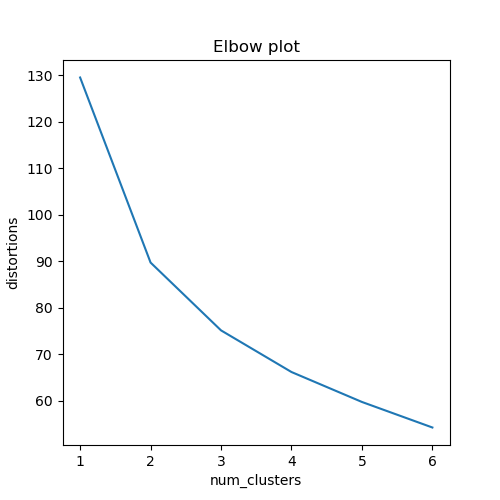

In [8]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = []
g = []
b = []
 
for row in image:
    for pixel in row:
        # A pixel contains RGB values
        r.append(pixel[0])
        g.append(pixel[1])
        b.append(pixel[2])
 
df = pd.DataFrame({'red':r, 'green':g, 'blue':b})

distortions = []
num_clusters = range(1, 7)
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['red','green','blue']].values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Creat a line plot of num_clusters and distortions
plt.figure(num = 4, figsize=(5,5))
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)

plt.xticks(num_clusters)
plt.title('Elbow plot')
plt.show()

interactive(children=(IntSlider(value=2, description='k', max=6, min=1), Output()), _dom_classes=('widget-inte…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
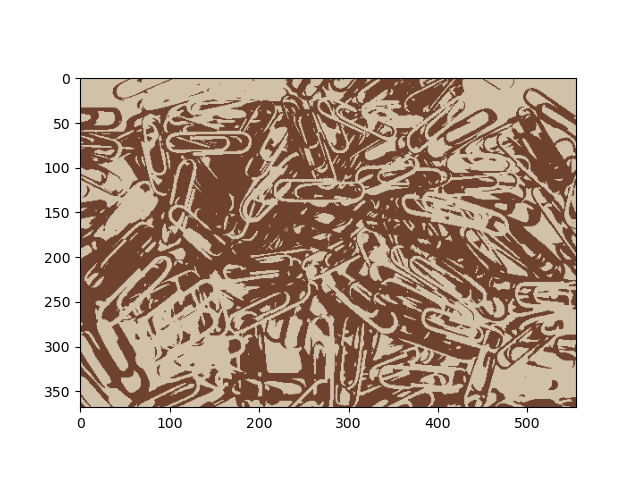

In [9]:
fig = plt.figure()
path = 'image.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts=10

@interact(k=widgets.IntSlider(min=1, max=6, step=1, value=2))
def image_segmentation(k):
    plt.clf()
    
    
    ret,label,center=cv2.kmeans(twoDimage,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    plt.imshow(result_image)
